In [2]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [3]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 2 * X + 3 + torch.randn(100, 1)

In [9]:
class HuberLoss(nn.Module):
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
        
    def forward(self, true, pred):
        deviation = true - pred
        mask = (deviation.abs() <= self.threshold)
        loss = torch.where(mask, .5 * (deviation**2), self.threshold*deviation.abs() - 0.5*self.threshold)
        return loss.mean()

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single input and single output

    def forward(self, x):
        return self.linear(x)

In [11]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = HuberLoss(0.9)

In [13]:
epochs = 100
for epoch in range(epochs):
    pred = model(X)
    loss = criterion(y, pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Loss: {loss}")

Loss: 0.856479823589325
Loss: 0.8470966219902039
Loss: 0.8386846780776978
Loss: 0.829904317855835
Loss: 0.8207626342773438
Loss: 0.8121607303619385
Loss: 0.8031975030899048
Loss: 0.7943224310874939
Loss: 0.7855342626571655
Loss: 0.7768325805664062


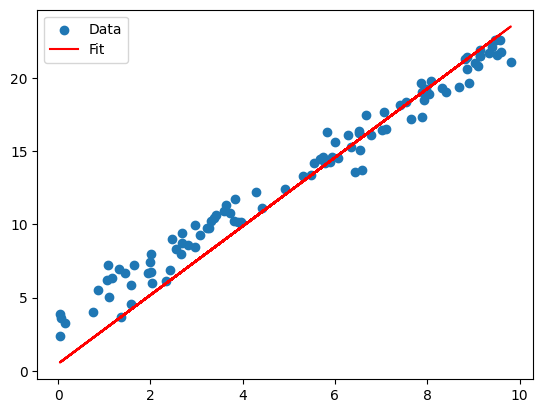

In [17]:
[w, b] = model.linear.parameters()
plt.figure()
plt.scatter(X, y, label='Data')
plt.plot(X, w.item()*X + b.item(), 'r', label='Fit')
plt.legend()
plt.show()